## LSTM

This notebook is meant to set up an LSTM for predicting load.

In [2]:
#!/usr/bin/env python
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from lstm import LSTM

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data = pd.read_csv("./data/data_oct20.csv", parse_dates = ["date"])
data = data.iloc[::10]
data.head(2)

,L2_react,L2,L,L_react,NS4949_export,L2_active_import,PV,Wind_speed,Temperature,Global_irradiance,Plane_irradiance,Module_temp,Bat_current,Bat_energy,Battery_SOC,Battery_voltage,Battery_charge,Battery_discharge,date,L1
0,-1.672253,8.917166,105.823796,-1.330095,103.75,7.500,0.003709,5.0,1.885714,0.017964,0.018072,0.000171,-0.181818,762.249603,69.649998,751.549988,0.000042,0.000031,2020-10-01 01:00:00,96.906629
10,-1.528216,6.749649,99.311711,1.809572,115.00,5.625,0.037092,3.0,13.221428,0.179641,0.180723,0.001712,-0.714286,761.702393,69.599998,751.555542,0.000416,0.000313,2020-10-01 01:10:00,92.562062


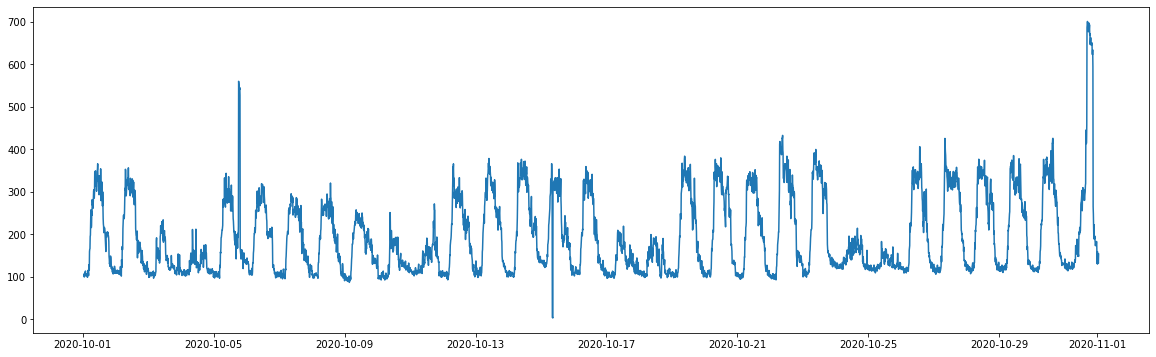

In [4]:
plt.figure(figsize = (20, 6))
plt.plot(data.date, data.L)
plt.show()

In [74]:
lstm = LSTM("./data/data_oct20.csv", "PV", ["Global_irradiance", "Temperature", "time"], 2, 12, lstm_nodes= 30, sample_rate = 10, clean=50)

Prepared data with the following variables: ['PV', 'Global_irradiance', 'Temperature', 'time']
Shape of train set (3571, 2, 4), shape of test set (880, 2, 4).

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 30)                4200      
_________________________________________________________________
dense_21 (Dense)             (None, 48)                1488      
Total params: 5,688
Trainable params: 5,688
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/100
56/56 - 1s - loss: 0.0400 - val_loss: 0.0221
Epoch 2/100
56/56 - 0s - loss: 0.0161 - val_loss: 0.0241
Epoch 3/100
56/56 - 0s - loss: 0.0151 - val_loss: 0.0184
Epoch 4/100
56/56 - 0s - loss: 0.0127 - val_loss: 0.0187
Epoch 5/100
56/56 - 0s - loss: 0.0123 - val_loss: 0.0175
Epoch 6/100
56/56 - 0s - loss: 0.0115 - val_loss: 0.0155
Epoch 7/100
56/56 - 0s - loss: 0.0117 - val_loss: 0.0142
Epoch 8/100
56/56 - 0s - loss: 0.0110 - val_loss: 0.0125
Epoch 9/100
56/56 - 0s - loss: 0.0104 - val_loss: 0.0105
Epoch 10/100
56/56 - 0s - loss: 0.0094 - val_loss: 0.0120
Epoch 11/100
56/56 - 0s - loss: 0.0097 - val_loss: 0.0138
Epoch 12/100
56/56 - 0s - loss: 0.0101 - val_loss: 0.0138
Epoch 13/100
56/56 - 0s - loss: 0.0092 - val_loss: 0.0122
Epoch 14/100
56/56 - 0s - loss: 0.0090 - val_loss: 0.0146

Epoch 00014: ReduceLROnPlateau reducing learning rate to 0.05000000074505806.
Epoch 15/100
56/56 - 0s - loss: 0.0090 - val_loss: 0.0110
Epoch 16/100
56/56 - 0s - loss: 0.0092 - val_loss: 0.0089
Ep

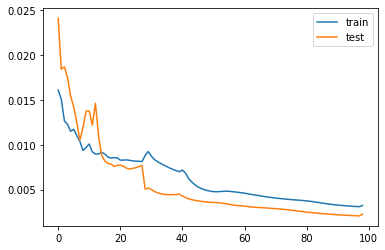

In [75]:
lstm.train_model(epochs = 100, verbose = 2)
lstm.plot_training_history()

(880, 2)


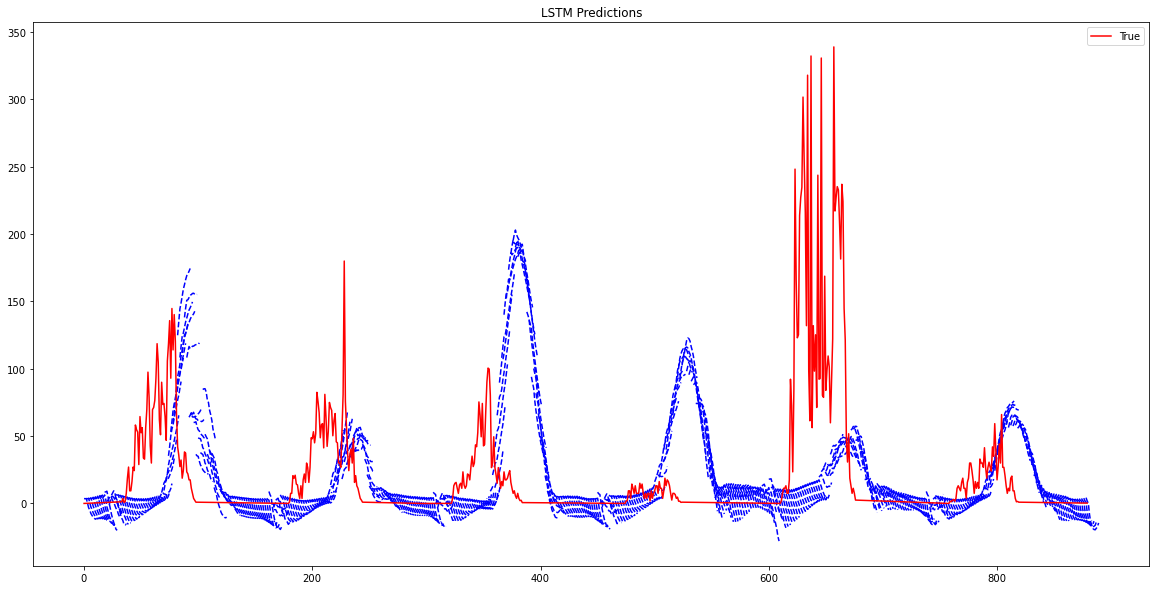

In [78]:
yhat = lstm.predict_on_test_set()
lstm.plot_test_set(yhat, 2000, plot_every=2)


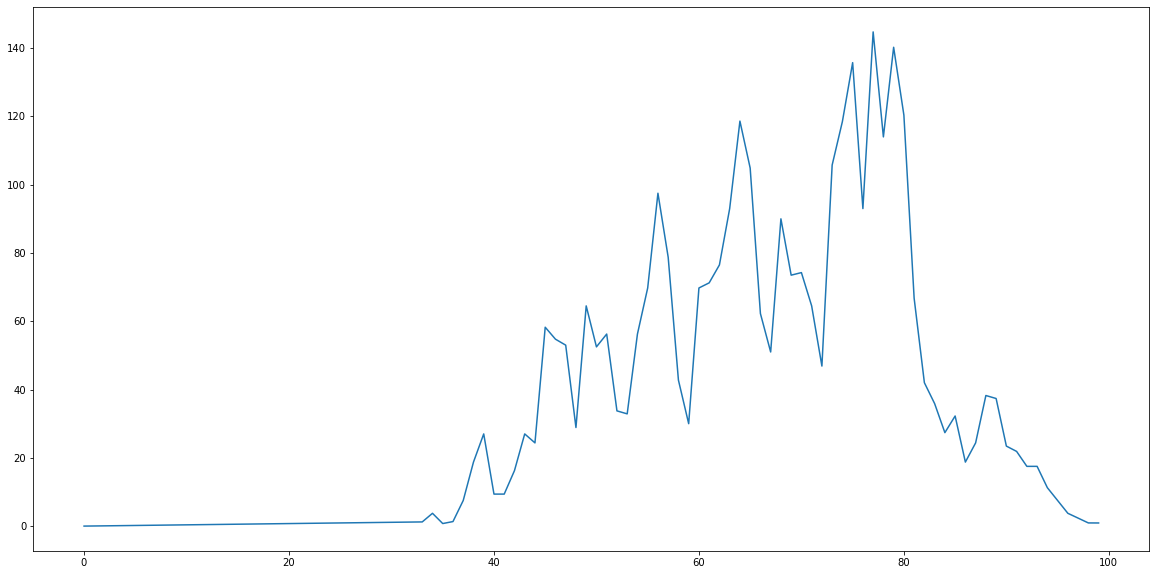

In [49]:
plt.figure(figsize=(20,10))
plt.plot(range(100), data["PV"][:100])

In [898]:
yhat.shape

(8909, 15)